In [60]:
import pandas as pd  
import glob 
import warnings
import numpy as np    
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display               
from sklearn.datasets import dump_svmlight_file   
from time import gmtime, strftime 
import seaborn as sns
import sys                                        
import math                                       
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
path_to_excel_files = glob.glob(r'F:\newdata.xlsx')
for excel in path_to_excel_files:
 out = excel.split('.')[0]+'.csv'
 df = pd.read_excel(excel,skiprows=0)
 df.to_csv(out) 

In [62]:
data = df

In [63]:
#see all column names & rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [64]:
data.head(10)

,Clay_ob,Silt_ob,Sand_ob,db_ob,clay_p,silt_p,sand_p,db_p
0,14.376078,37.377803,48.246118,1.5075,27,20,57,1.38
1,11.248594,33.745782,55.005624,1.5297,26,22,53,1.37
2,19.960000,20.190000,59.850000,1.4900,25,19,57,1.45
3,20.010000,6.530000,73.460000,1.6000,23,18,58,1.49
4,35.460000,26.840000,37.700000,1.3200,26,22,54,1.38
5,25.375154,31.900369,42.724477,1.4437,28,22,54,1.37
6,11.346445,41.603631,47.049924,1.5025,23,20,55,1.40
7,23.650000,39.650000,36.700000,1.4100,21,17,61,1.49
8,30.120000,23.450000,46.430000,1.4300,22,17,58,1.47
9,28.970000,34.980000,36.050000,1.3900,26,21,59,1.41


In [65]:
data.describe()

,Clay_ob,Silt_ob,Sand_ob,db_ob,clay_p,silt_p,sand_p,db_p
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,30.483031,33.009827,34.503984,1.369910,26.126316,19.442105,54.442105,1.409579
std,12.679921,14.153390,14.390270,0.166721,2.384534,1.831845,3.331717,0.031955
min,8.615738,5.000000,5.240000,0.945102,21.000000,16.000000,45.000000,1.330000
25%,20.825000,20.601204,23.600000,1.210100,25.000000,18.000000,53.000000,1.390000
50%,30.000000,33.130867,33.500000,1.410000,26.000000,19.000000,55.000000,1.410000
75%,39.605000,41.801815,46.015000,1.514724,27.500000,20.000000,56.000000,1.430000
max,65.445026,66.920000,73.460000,1.686400,34.000000,24.000000,61.000000,1.490000


In [66]:
data['Clay_ob'] = data['Clay_ob']/100

In [67]:
data['Silt_ob'] = data['Silt_ob']/100

In [68]:
data['Sand_ob'] = data['Sand_ob']/100

In [69]:
data['db_ob'] = data['db_ob']/2

In [70]:
data['clay_p'] = data['clay_p']/100

In [71]:
data['silt_p'] = data['silt_p']/100

In [72]:
data['sand_p'] = data['sand_p']/100

In [73]:
data['db_p'] = data['db_p']/2

In [74]:
pd.set_option('display.max_columns', 10)

In [75]:
data.head(10)

,Clay_ob,Silt_ob,Sand_ob,db_ob,clay_p,silt_p,sand_p,db_p
0,0.143761,0.373778,0.482461,0.75375,0.27,0.20,0.57,0.690
1,0.112486,0.337458,0.550056,0.76485,0.26,0.22,0.53,0.685
2,0.199600,0.201900,0.598500,0.74500,0.25,0.19,0.57,0.725
3,0.200100,0.065300,0.734600,0.80000,0.23,0.18,0.58,0.745
4,0.354600,0.268400,0.377000,0.66000,0.26,0.22,0.54,0.690
5,0.253752,0.319004,0.427245,0.72185,0.28,0.22,0.54,0.685
6,0.113464,0.416036,0.470499,0.75125,0.23,0.20,0.55,0.700
7,0.236500,0.396500,0.367000,0.70500,0.21,0.17,0.61,0.745
8,0.301200,0.234500,0.464300,0.71500,0.22,0.17,0.58,0.735
9,0.289700,0.349800,0.360500,0.69500,0.26,0.21,0.59,0.705


In [76]:
X=data[['Clay_ob']]
y=data[['clay_p']]



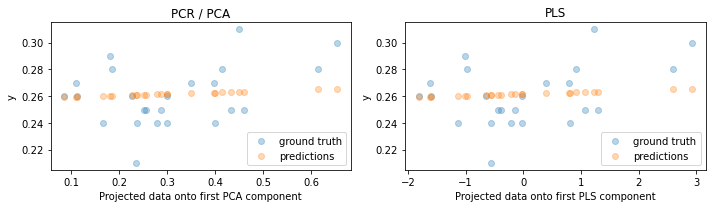

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()

plt.tight_layout()
plt.show()

In [78]:
from scipy import stats

In [79]:
stats.spearmanr(data['Clay_ob'],data['clay_p'])

SpearmanrResult(correlation=0.08324780086483677, pvalue=0.42252332725523534)

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
mean_squared_error(data['Clay_ob'], data['clay_p'])

0.01754697684019461

In [82]:
data1 = {'Clay_ob': data['Clay_ob'],
        'clay_p': data['clay_p']
        }

df1 = pd.DataFrame(data1,columns=['Clay_ob','clay_p'])
print (df1)

     Clay_ob  clay_p
0   0.143761    0.27
1   0.112486    0.26
2   0.199600    0.25
3   0.200100    0.23
4   0.354600    0.26
5   0.253752    0.28
6   0.113464    0.23
7   0.236500    0.21
8   0.301200    0.22
9   0.289700    0.26
10  0.227100    0.25
11  0.271400    0.26
12  0.107181    0.27
13  0.181378    0.29
14  0.396500    0.26
15  0.103359    0.26
16  0.086157    0.26
17  0.110436    0.27
18  0.186451    0.28
19  0.115700    0.30
20  0.614754    0.28
21  0.654450    0.30
22  0.459700    0.25
23  0.101902    0.26
24  0.257200    0.25
25  0.206500    0.27
26  0.402576    0.33
27  0.398000    0.27
28  0.355800    0.26
29  0.278800    0.24
30  0.530000    0.32
31  0.320000    0.25
32  0.480000    0.28
33  0.281000    0.24
34  0.300000    0.26
35  0.350000    0.25
36  0.300000    0.24
37  0.400000    0.23
38  0.450000    0.24
39  0.350000    0.25
40  0.350000    0.32
41  0.400000    0.27
42  0.350000    0.28
43  0.400000    0.28
44  0.300000    0.26
45  0.450000    0.31
46  0.300000 

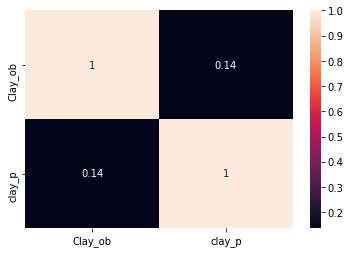

In [83]:
df1.corr()
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

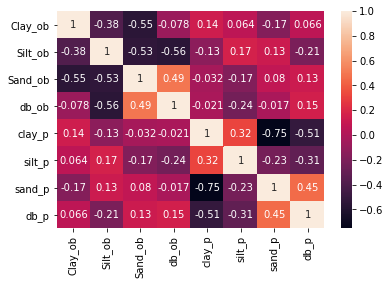

In [84]:
df.corr()
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()